## AI + 피지컬 컴퓨팅: BrainAI Car 자율주행 프로젝트 
### BrainAI Car 자율주행 [도로인식 AI 모델 훈련] 실행 프로그램

#### 실행 파일
- 실행 파일: Step5. BrainAI_Car_AD_모델링 (Jupyter lab).ipynb
- 필요 모듈: /utils/model_train.py

활동 제목: BrainAI Car 도로인식 자율주행 AI 모델 만들기 (MobileNet 버전) <br>
활동 설명: MobileNet Transfer Learning을 이용하여  <br>
          BrainAI Car의 도로인식 자율주행 AI 모델을 훈련시킵니다.
#### 주요 기능:
- dataset_laneD1_laneD1 폴더의 train/validation 데이터를 읽어서
- MobileNet 기반 Transfer Learning으로 CNN 모델을 훈련시킵니다
- 훈련된 모델을 저장합니다

#### 실행 방법:
1. 셀을 위에서부터 차례대로 실행
2. 각 셀의 설명을 읽고 이해하기
3. 결과를 확인하며 진행하기

[왜 MobileNet인가?]
- 빠른 학습: Custom CNN 대비 50% 시간 절약
- 높은 성능: 적은 데이터로도 우수한 결과
- 안정적: 사전 학습으로 안정적인 수렴
- 실무 표준: 업계에서 널리 사용

In [1]:
# 필요 라이브러리 불러오기
import os
import sys
from pathlib import Path

from utils.model_train import TrainingConfig, model_train

C:\BrainAI\vbrainai_car\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


pygame 2.6.1 (SDL 2.28.4, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Jupyter Notebook의 현재 디렉토리
notebook_path = Path(os.getcwd())
data_path = notebook_path

print(f"Data will be saved to: {data_path}")

Data will be saved to: C:\BrainAI\BrainAI_Car


In [3]:
#  메인 실행 함수
def main():
    """
    MobileNet 모델 훈련 실행 함수
    
    [MobileNet Transfer Learning 설정]
    - epochs: 50 → MobileNet은 빠르게 수렴하므로 50회면 충분
    - batch_size: 32 → 표준 배치 크기
    - learning_rate: 0.001 → 적당한 학습 속도
    - use_augmentation: False → 선택적 (필요시 True로 변경)
    
    [Transfer Learning이란?]
    - ImageNet으로 사전 학습된 MobileNet 활용
    - 선, 곡선, 경계 등 기본 특징은 이미 학습됨
    - 우리는 조향 예측만 새로 학습
    - 결과: 빠른 학습 + 높은 성능!
    """
    
    # 훈련 설정
        
    # 데이터 증강 설정 (사용자 선택)
    # ========================================
    print("\n" + "=" * 60)
    print(" 데이터 증강 설정")
    print("=" * 60)
    print("\n[데이터 증강이란?]")
    print("  기존 이미지를 약간 변형하여 데이터를 늘리는 기법")
    print("\n[장점]")
    print("  - 다양한 환경(밝기, 그림자 등)에 강건해짐")
    print("  - 과적합(Overfitting) 방지")
    print("  - 적은 데이터로도 좋은 성능")
    print("\n[적용되는 증강 (안전한 증강만)]")
    print("  • Color Jitter: 밝기, 대비, 색상 변화")
    print("  • Gaussian Noise: 카메라 노이즈 추가")
    print("\n[주의]")
    print("  - 좌우반전, 회전 등은 조향각이 바뀌므로 사용하지 않습니다!")
    print("=" * 60)

    # 사용자 입력 받기
    while True:
        augmentation_choice = input("\n 데이터 증강을 사용하시겠습니까? (Y/N): ").strip().upper()
        
        if augmentation_choice in ['Y', 'YES', 'ㅛ']:  # ㅛ는 한글 키보드 오타 대응
            use_augmentation = True
            print(" 데이터 증강을 사용합니다.")
            
            # 증강 옵션 선택
            print("\n어떤 증강을 적용하시겠습니까?")
            print("  1. 모두 적용 (권장)")
            print("  2. Color Jitter만")
            print("  3. Gaussian Noise만")
            
            aug_option = input("선택 (1-3, Enter=1): ").strip()
            
            if aug_option == '2':
                augmentation_options = {
                    'COLOR_JITTER': True,
                    'GAUSSIAN_NOISE': False
                }
                print(" Color Jitter만 적용합니다.")
            elif aug_option == '3':
                augmentation_options = {
                    'COLOR_JITTER': False,
                    'GAUSSIAN_NOISE': True
                }
                print(" Gaussian Noise만 적용합니다.")
            else:  # '1' 또는 Enter
                augmentation_options = {
                    'COLOR_JITTER': True,
                    'GAUSSIAN_NOISE': True
                }
                print(" 모든 증강을 적용합니다.")
            
            break
            
        elif augmentation_choice in ['N', 'NO', 'ㅜ']:  # ㅜ는 한글 키보드 오타 대응
            use_augmentation = False
            augmentation_options = {
                'COLOR_JITTER': False,
                'GAUSSIAN_NOISE': False
            }
            print(" 데이터 증강을 사용하지 않습니다.")
            break
            
        else:
            print(" 잘못된 입력입니다. Y 또는 N을 입력하세요.")

    # 훈련 설정
    config = TrainingConfig(
        dataset_laneD1_path=os.path.join(data_path, "dataset_laneD1"),
        model_name="brainai_car_laneD1",
        epochs=50,
        batch_size=32,
        img_height=224,
        img_width=224,
        learning_rate=0.0005,
        use_augmentation=use_augmentation,        # 사용자 선택값
        augmentation_options=augmentation_options  # 사용자 선택값
    )

    # 모델 저장 경로
    models_dir = os.path.join(data_path, "models_laneD1")
    
    print(f"\n 데이터셋 경로: {config.dataset_laneD1_path}")
    print(f" 모델 저장 경로: {models_dir}")

    # 경로 확인
    if not os.path.exists(config.dataset_laneD1_path):
        print("\n dataset 폴더를 찾을 수 없습니다!")
        print(f"   경로: {config.dataset_laneD1_path}")
        print("\n 해결 방법:")
        print("  1. 먼저 데이터를 수집하세요")
        print("  2. create_dataset.py를 실행하여 데이터셋을 만드세요")
        return

    # MobileNet 모델 훈련 실행 (바로 시작)
    input("\n Enter를 누르면 훈련을 시작합니다...")
    model_train(config, models_dir)


 데이터 증강 설정

[데이터 증강이란?]
  기존 이미지를 약간 변형하여 데이터를 늘리는 기법

[장점]
  - 다양한 환경(밝기, 그림자 등)에 강건해짐
  - 과적합(Overfitting) 방지
  - 적은 데이터로도 좋은 성능

[적용되는 증강 (안전한 증강만)]
  • Color Jitter: 밝기, 대비, 색상 변화
  • Gaussian Noise: 카메라 노이즈 추가

[주의]
  - 좌우반전, 회전 등은 조향각이 바뀌므로 사용하지 않습니다!



 데이터 증강을 사용하시겠습니까? (Y/N):  n


 데이터 증강을 사용하지 않습니다.

 데이터셋 경로: C:\BrainAI\BrainAI_Car\dataset_laneD1
 모델 저장 경로: C:\BrainAI\BrainAI_Car\models_laneD1



 Enter를 누르면 훈련을 시작합니다... 


ℹ️ GPU 없음 - CPU로 훈련 (시간이 오래 걸릴 수 있습니다)

🎓 Transfer Learning with MobileNet

[Transfer Learning이란?]
  이미 다른 작업으로 학습된 모델을 활용하는 기법

[MobileNet 사전 학습 정보]
  - 데이터: ImageNet (1,400만 장)
  - 카테고리: 1,000개 (동물, 차량, 사물 등)
  - 학습 내용: 선, 곡선, 경계, 질감, 패턴 등

[우리가 할 일]
  - MobileNet: 특징 추출 (이미 학습됨, 고정)
  - Dense 레이어: 조향 예측 (새로 학습)

[장점]
  ⚡ 빠른 학습 속도 (50 에포크면 충분)
  🎯 높은 초기 성능 (첫 에포크부터 좋은 결과)
  💾 적은 데이터 필요 (500~1,000장으로도 가능)

📋 훈련 설정
📂 데이터셋: C:\BrainAI\BrainAI_Car\dataset_laneD1
🏷️  모델명: brainai_car_laneD1
🔁 에포크(반복): 50회
📦 배치 크기: 32개
🖼️  이미지 크기: 224x224
⚡ 학습률: 0.0005
🎨 데이터 증강: 미사용

📥 데이터 로드 중...

[훈련 데이터]
📂 8395개 이미지 발견...
⏳ 진행중... 10%
⏳ 진행중... 20%
⏳ 진행중... 30%
⏳ 진행중... 40%
⏳ 진행중... 50%
⏳ 진행중... 60%
⏳ 진행중... 70%
⏳ 진행중... 80%
⏳ 진행중... 90%
⏳ 진행중... 100%

  ✅ 8395개 로드 완료! (100.0%)              

  ✅ 로드 성공률: 100.0%

  📊 데이터 품질 평가:
     🌟 우수: 8395개
        → 매우 좋은 학습 성능 기대

[검증 데이터]
📂 3598개 이미지 발견...
⏳ 진행중... 10%
⏳ 진행중... 20%
⏳ 진행중... 30%
⏳ 진행중... 40%
⏳ 진행중... 50%
⏳ 진행중... 60%
⏳ 진행중... 70%
⏳ 진행중... 80%
⏳ 진행중.

Model: "BrainAI_Car_MobileNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)        │ (None, 7, 7, 720)           │       1,808,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 720)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ steering_fc1 (Dense)                 │ (None, 64)                  │          46,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout1 (Dropout)                   │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ steering_fc2 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ steering_output (Dense)              │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,856,993 (7.08 MB)

 Trainable params: 48,257 (188.50 KB)

 Non-trainable params: 1,808,736 (6.90 MB)


🚀 MobileNet 모델 훈련 시작 - 50 에포크

💡 Tip:
  - MobileNet은 빠르게 수렴합니다
  - 보통 20~50 에포크면 충분합니다
  - val_loss가 더 이상 감소하지 않으면 자동 중단됩니다

💾 모델 저장 경로: C:\BrainAI\BrainAI_Car\models_laneD1\brainai_car_laneD1_mobilenet_20251113_141837.keras
Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.0603 - mae: 0.1865
Epoch 1: val_loss improved from None to 0.03398, saving model to C:\BrainAI\BrainAI_Car\models_laneD1\brainai_car_laneD1_mobilenet_20251113_141837.keras
263/263 ━━━━━━━━━━━━━━━━━━━━ 74s 251ms/step - loss: 0.0474 - mae: 0.1647 - val_loss: 0.0340 - val_mae: 0.1402 - learning_rate: 5.0000e-04
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.0336 - mae: 0.1413
Epoch 2: val_loss improved from 0.03398 to 0.02943, saving model to C:\BrainAI\BrainAI_Car\models_laneD1\brainai_car_laneD1_mobilenet_20251113_141837.keras
263/263 ━━━━━━━━━━━━━━━━━━━━ 79s 242ms/step - loss: 0.0320 - mae: 0.1367 - val_loss: 0.0294 - val_mae: 0.1297 - learning_rate: 5.0000e-04
Epoch 3/50
263/263 ━━━━

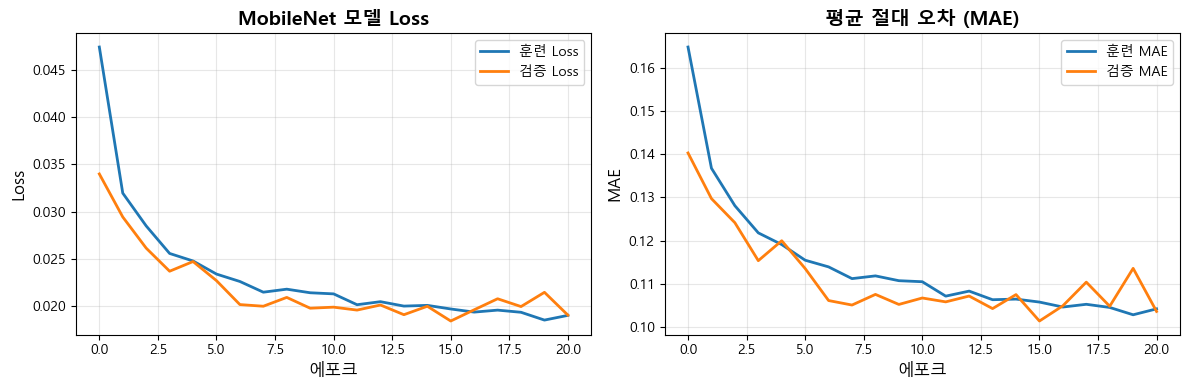


✅ MobileNet 훈련 완료!

📁 생성된 파일:
  • models/ 폴더에 훈련된 MobileNet 모델
  • 훈련 그래프 이미지

🎯 다음 단계:
  1. 자율주행 테스트 실행
  2. 성능이 부족하면 Fine-tuning 실행
  3. 더 많은 데이터 수집 후 모델 업데이트

💡 Fine-tuning이란?
  - MobileNet의 일부 레이어 일부를 학습 가능 상태로 전환하여 추가로 미세 조정하는 과정
  - 도로 인식에 더 특화되게 최적화
  - update_model.py 사용


In [4]:
#  프로그램 시작점
if __name__ == "__main__":
    try:
        main()
    except KeyboardInterrupt:
        print("\n\n 사용자가 훈련을 중단했습니다.")
        print("   (Ctrl+C 입력됨)")
    except Exception as e:
        print(f"\n\n 예상치 못한 오류 발생: {e}")
        import traceback
        traceback.print_exc()
        print("\n 선생님께 위의 오류 메시지를 보여주세요.")


## 버전 정보
- __version__ = 'BrainAI_Car_2025.1.0.0'
- __author__ = 'BrainAI Co,.Ltd.'
- __description__ = 'BrainAI Autonomous Driving Project - Modeling'
